In [1]:
"""
  Author : Mann Desai
  Subject : ML(SEM_6)
  Topic : Linear, Logistic Regression
  Lab : 08
"""

# Lab 08 : Linear Regression using Torch :
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')

In [ ]:
targets = np.array([[56],[81],[119],[22],[103]], dtype='float32')

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
tensor([[-208.2938],
        [-255.0745],
        [-258.1687],
        [-290.3619],
        [-189.4681]], grad_fn=<AddBackward0>)


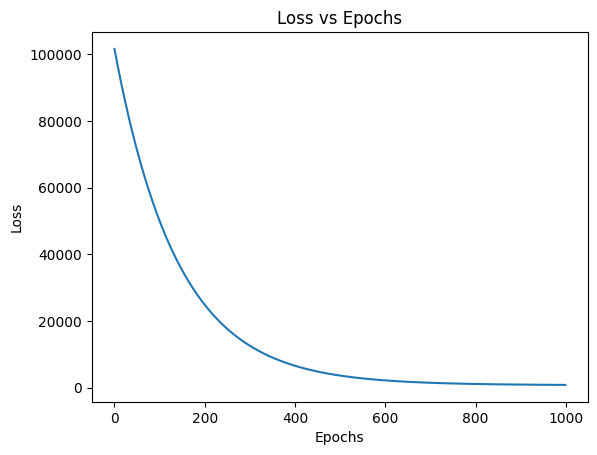

tensor([[ 41.1998],
        [ 72.0527],
        [124.0299],
        [-36.5925],
        [120.9367]], grad_fn=<AddBackward0>)


In [ ]:
 # Convert inputs and targets to tensors
input_tensor = torch.tensor(inputs)
target_tensor = torch.tensor(targets)

print(type(input_tensor))
print(type(inputs))
print(type(target_tensor))


# We need to take those random values of weight and biases so that their mean=0 and std=1 so that normalization can be performed.
w = torch.randn(1,3, requires_grad=True)
b = torch.randn(1,requires_grad=True)

def LinearModel(x):
  return x @ w.t() + b

pred = LinearModel(input_tensor)
print(pred)

def MSELoss(a, b):
  diff = a - b
  return torch.sum(diff * diff)/diff.numel()

learning_rate = 0.0000001
losses = []


# 1000 epochs :
for i in range(1000):
  preds = LinearModel(input_tensor)
  loss = MSELoss(preds, target_tensor)
  # print(loss.size())
  # print(loss)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    # we need to zero every time we calculated gradient.
    w.grad.zero_()
    b.grad.zero_()

  losses.append(loss.item())

plt.plot(range(1000), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


#Calculate Loss :
preds = LinearModel(input_tensor)
loss = MSELoss(preds, target_tensor)

print(preds)



In [ ]:
# Targets
print(targets)

#Testing on different values of temprature, rain, humidity :
print("Prediction : ", LinearModel(torch.tensor([87., 134., 58.])))
print("Weights after training:", w)
print("Bias after training:", b)
print("Final Loss after training:", loss.item())



[[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]
Prediction :  tensor([124.0299], grad_fn=<AddBackward0>)
Weights after training: tensor([[-1.3878,  1.1996,  1.4592]], requires_grad=True)
Bias after training: tensor([-0.6050], requires_grad=True)
Final Loss after training: 815.841796875


In [3]:
# Lab 8_1 : Logistic Regression

In [81]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/BuyComputer.csv')
print(data.head)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of       User ID  Age  EstimatedSalary  Purchased
0    15624510   19            19000          0
1    15810944   35            20000          0
2    15668575   26            43000          0
3    15603246   27            57000          0
4    15804002   19            76000          0
..        ...  ...              ...        ...
395  15691863   46            41000          1
396  15706071   51            23000          1
397  15654296   50            20000          1
398  15755018   36            33000          0
399  15594041   49            36000          1

[400 rows x 4 columns]>


Accuracy: 0.8875
Precision: 0.9230769230769231
Recall: 0.7741935483870968


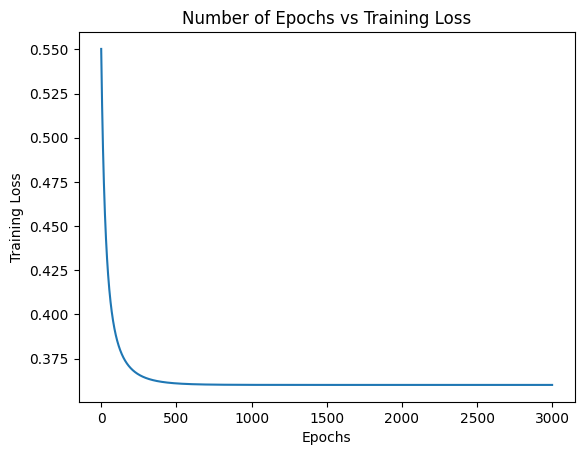

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

X = data.drop(columns=['User ID', 'Purchased'])
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

np.random.seed(123)  # Setting random seed
len_x = len(X_train[0])
w = np.random.rand(len_x)
b = 0.2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(inputs):
    return sigmoid(np.dot(inputs, w) + b)

def loss_func(y, a):
    J = -(y * np.log(a) + (1 - y) * np.log(1 - a)).mean()
    return J

alpha = 0.1  # Learning rate
losses = []
for epoch in range(3000):
    z = np.dot(X_train, w) + b
    a = sigmoid(z)
    J = loss_func(y_train, a)
    losses.append(J)
    dz = a - y_train
    dw = np.dot(X_train.T, dz) / len(X_train)
    db = np.sum(dz) / len(X_train)
    w -= alpha * dw
    b -= alpha * db

y_pred = predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

plt.plot(range(3000), losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Number of Epochs vs Training Loss')
plt.show()

In [90]:
#Testing on 28 years age, 76000 salary whether that person purchase or not?

new_data = np.array([[28, 76000]])
new_scaled_data = sc.transform(new_data)
prediction = predict(new_scaled_data)
print("probability of purchase : ", prediction)

if prediction >= 0.5:
  print("The person is predicted to purchase computer")
else:
  print("The person is predicted not to purchase computer")

probability of purchase :  [0.04858055]
The person is predicted not to purchase computer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
#Using Sklearn inbuilt Logistic regression :
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=68)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Make predictions using the trained model
new_data = np.array([[28, 76000]])

new_data_scaled = sc.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Prediction:", prediction)

if prediction == 1:
    print("The person is predicted to purchase a computer.")
else:
    print("The person is predicted not to purchase a computer.")

Accuracy: 0.8875
Precision: 0.9230769230769231
Recall: 0.7741935483870968
Prediction: [0]
The person is predicted not to purchase a computer.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
